# 1. Introduction

## 🎯 Objective  
The goal of this EDA is to uncover patterns in product, inventory, and supply chain data that can help improve **demand forecasting** and **supply chain efficiency**. We'll explore key drivers like stock levels, supplier performance, and inventory types to support better decision-making.

## 📦 Data Overview  
The dataset includes **[Number] rows** and **[Number] columns**, covering product-related data from **[Start Date]** to **[End Date]**. It provides detailed insights into:  
* Inventory levels  
* Supplier lead times  
* Warehouse distribution  
* Inventory categorization  

These features are crucial for analyzing product availability and demand fulfillment.


# 2. Univariate Analysis


   * Analyze each variable individually to understand its distribution and central tendencies.

## 2.1. Numerical Variables

### StockLevel:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\3_CLEANED DATA\inventory_data_Cleaned.csv.csv")

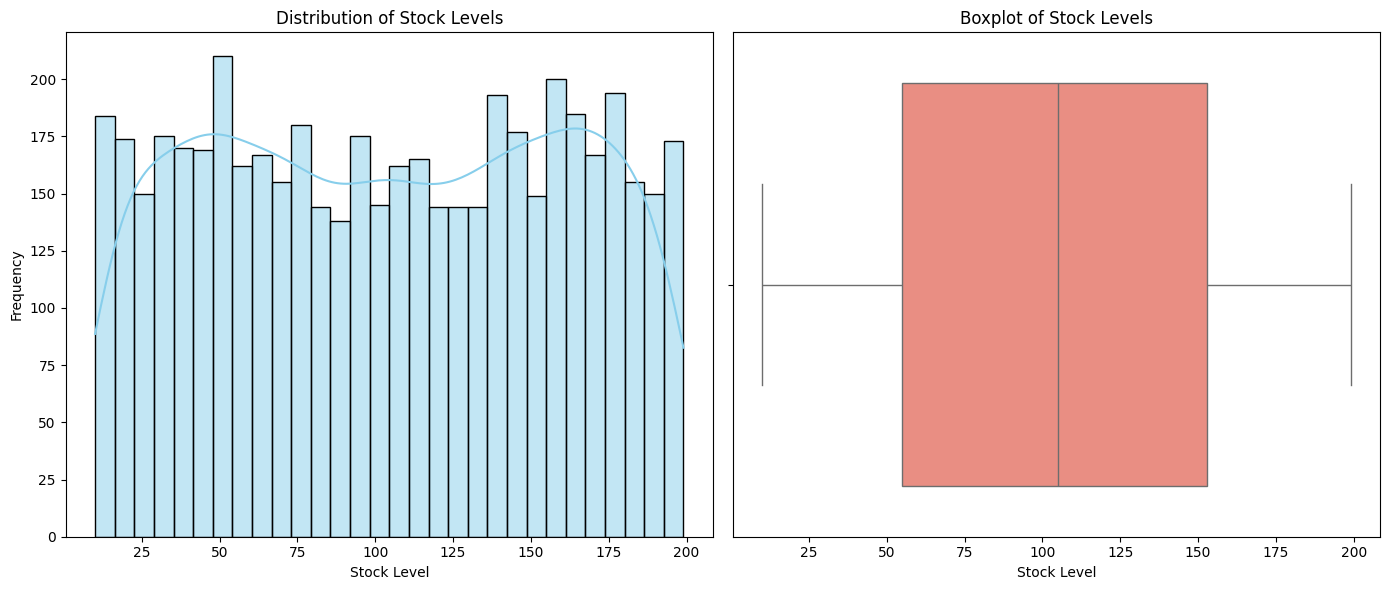

In [3]:
# Sample Data Load (replace with your actual dataframe)
# df = pd.read_csv("your_file.csv")

plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['StockLevel'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Stock Levels')
plt.xlabel('Stock Level')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['StockLevel'], color='salmon')
plt.title('Boxplot of Stock Levels')
plt.xlabel('Stock Level')

plt.tight_layout()
plt.show()


## Stock Level Insights

* **Range:** Stock levels vary from 0 to 200.
* **Peaks:** Multiple peaks seen around 25–50, 75–100, 125–150, and 175–200.
* **Median:** About 100–110.
* **Spread:** Most values lie between 50–60 and 150–160.
* **Outliers:** None observed.
* **Summary:** Stock levels are spread across the range without extreme values.


## Supplier Delay

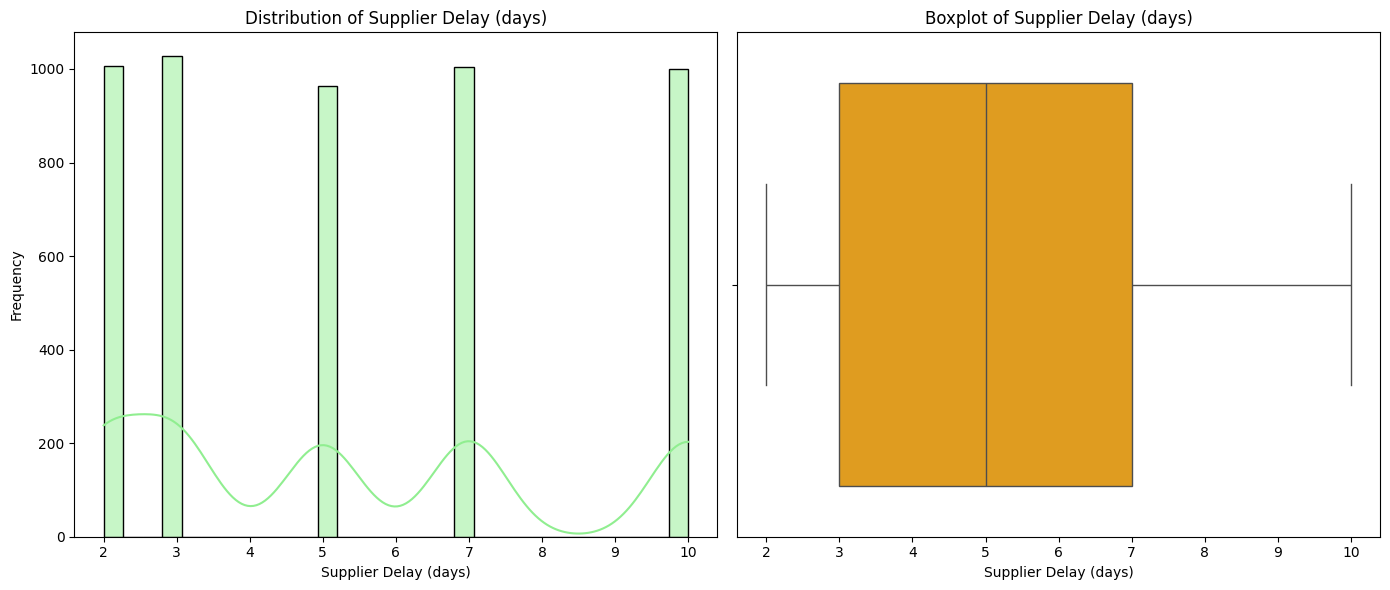

In [4]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['SupplierDelay(days)'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Supplier Delay (days)')
plt.xlabel('Supplier Delay (days)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['SupplierDelay(days)'], color='orange')
plt.title('Boxplot of Supplier Delay (days)')
plt.xlabel('Supplier Delay (days)')

plt.tight_layout()
plt.show()
